In [2]:
import pandas as pd 
#diab = pd.read_excel('./global_superstore_2016.xlsx')
diab=pd.read_csv('./diabetes.csv')
diab.head

FileNotFoundError: [Errno 2] No such file or directory: './diabetes.csv'

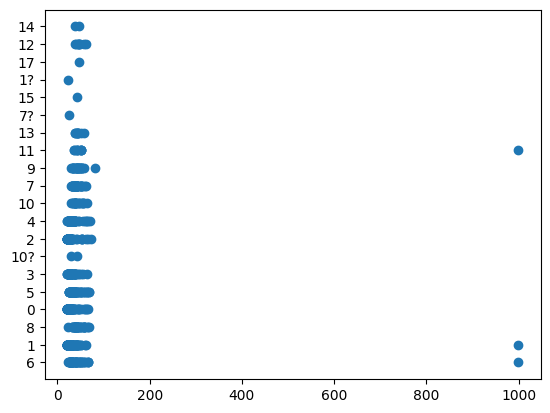

In [ ]:
import matplotlib.pyplot as mp

#mp.scatter(diab['Segment'],diab['Customer ID'])
mp.scatter(diab['Age'],diab['Pregnancies'])

In [ ]:
import plotly.express as px

df = px.data.iris()
#fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", title="A Plotly Express Figure")
fig=px.scatter(diab,x="Age", y="Pregnancies")
# If you print the figure, you'll see that it's just a regular figure with data and layout
# print(fig)

fig.show()

In [ ]:
import plotly as plotly
plotly.offline.plot(fig,filename="./out/diabgraoh.html")

'./out/diabgraoh.html'

In [23]:

import pandas as pd
df=pd.read_excel('../inputdata/EQ_last1yr_output.xlsx',nrows=1000)
top100 =df.head(1000)
filterone=top100[top100['SYMBOL'].str.contains("3MINDIA")]
print(filterone)



     Unnamed: 0   SYMBOL SERIES      OPEN      HIGH       LOW     CLOSE  \
908       24822  3MINDIA     EQ  22130.00  22130.00  21400.00  21505.70   
909       46867  3MINDIA     EQ  21401.00  21675.00  21300.45  21602.00   
910       69474  3MINDIA     EQ  21800.00  22150.00  21602.05  22050.40   
911       89468  3MINDIA     EQ  22090.00  22400.00  22007.05  22388.00   
912      114171  3MINDIA     EQ  22388.00  22589.00  22164.00  22294.40   
..          ...      ...    ...       ...       ...       ...       ...   
995      255414  3MINDIA     EQ  23602.40  23948.65  23251.05  23495.60   
996      317085  3MINDIA     EQ  23534.45  23617.65  23195.00  23233.45   
997      339285  3MINDIA     EQ  23205.00  23384.40  23201.00  23299.25   
998      363930  3MINDIA     EQ  23207.00  23469.90  23001.00  23312.75   
999      386410  3MINDIA     EQ  23312.80  23500.00  23312.75  23363.35   

         LAST  PREVCLOSE  TOTTRDQTY     TOTTRDVAL    TIMESTAMP  TOTALTRADES  \
908  21535.00   2194

In [5]:
groupeddata= df['SYMBOL'].unique()
print(groupeddata[0])

20MICRONS


In [24]:
from dash import Dash, html, dcc, Input,Output
import pandas as pd
import plotly.express as px
app = Dash(__name__,serve_locally=True)


filterdata=top100
fig= px.line(filterdata,x='TIMESTAMP',y='CLOSE',color='SYMBOL')
#px.line_3d(x='TIMESTAMP',y='CLOSE',z='SYMBOL')
# Update the layout
fig.update_layout(title="Stock 2023", xaxis_title="Year", yaxis_title="CLOSE")
# Show the plot


app.layout = html.Div( style={'backgroundColor': 'white', 'padding': '20px'},children=[
    html.Div(children='Stocks '),
        dcc.Dropdown(
        id='stocksddn',
        options=groupeddata,
       value=groupeddata[0]  # default value
    ),
        dcc.Graph(id="linechartstock",figure=fig),
        
    html.Div(id='outputselection')
])



@app.callback(
   #  Output('outputselection', 'children'),
    Output('linechartstock', 'figure'),
     [Input('stocksddn', 'value')]
 )
def update_output(selected_option):
     #return f"You have selected {selected_option}"
    filterdata=top100[top100['SYMBOL'].str.contains(selected_option)]
    fig= px.line(filterdata,x='TIMESTAMP',y='CLOSE',color='SYMBOL')
    return fig
app.run(debug=True)
